In [1]:
# Data: https://www.kaggle.com/datasets/tushifire/housing-property-prices-puneindia

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df1 = pd.read_csv("pune_house_prices.csv")
df1.head()

,Unnamed: 0,additionalrooms,age,amenitiesavailable,amenitiesnot,area,balconies,bathroom,bhk,carpetarea,...,opensides,overlooking,ownership,possesiondate,price,pricepersquare,projectname,roadfaceing,status,totalfloor
0,0,NaN,2 - 3 years,"Lift Available,Car Parking,Power Backup,Indoor...","24 X 7 Security,Children's play area,Club Hous...","1,611 sq ft",2,3,3 BHK Apartment,1209 sq ft,...,2,Road View,Co-Operative Society,NaN,27000000,"₹ 16,759/ sq ft",Bhansali Prive Rio,40 feet,Ready to move,6
1,1,NaN,0 - 1 year,"Lift Available,Car Parking,Power Backup,24 X 7...","Children's play area,Sports Facility,Landscape...","1,279 sq ft",NaN,2,2 BHK Apartment,NaN,...,NaN,NaN,Freehold,NaN,7610050,"₹ 5,950/ sq ft",Goel Ganga Platino,NaN,Ready to move,NaN
2,2,NaN,0 - 1 year,"Lift Available,Car Parking,Power Backup,24 X 7...",Sports Facility,670 sq ft,NaN,1,1 BHK Apartment,NaN,...,NaN,NaN,Freehold,NaN,4100000,"₹ 6,119/ sq ft",Vilas Javdekar Yashwin,NaN,Ready to move,NaN
3,3,NaN,2 - 3 years,"Lift Available,Car Parking,Power Backup,24 X 7...","Sports Facility,Landscaped Gardens",956 sq ft,NaN,2,2 BHK Apartment,615 sq ft,...,NaN,NaN,Freehold,NaN,5736000,"₹ 6,000/ sq ft",Rohan Ishan,NaN,Ready to move,NaN
4,4,NaN,0 - 1 year,"Lift Available,Car Parking,Power Backup,24 X 7...","Club House,Swimming Pool,Sports Facility,Joggi...","1,706 sq ft",1,3,3 BHK Apartment,1195 sq ft,...,2,Road View,Freehold,NaN,29002000,"₹ 17,000/ sq ft",Swojas Aavishkar,60 feet,Ready to move,9


In [4]:
df1.shape

(37539, 24)

In [5]:
df1.isnull().sum().sort_values(ascending = False)

possesiondate         32803
roadfaceing           30664
carpetarea            28917
additionalrooms       28218
opensides             25934
overlooking           20399
balconies             15628
totalfloor            13425
projectname           13410
age                    9902
ownership              9383
facing                 6620
floor                  5620
amenitiesnot           3253
amenitiesavailable     3094
bathroom               2872
status                 1461
area                     21
pricepersquare            1
locality                  1
price                     1
neworold                  1
bhk                       1
Unnamed: 0                0
dtype: int64

In [6]:
df2 = df1.drop(df1.columns[df1.isnull().sum() > 20000 ], axis=1)
df2.head()

,Unnamed: 0,age,amenitiesavailable,amenitiesnot,area,balconies,bathroom,bhk,facing,floor,locality,neworold,ownership,price,pricepersquare,projectname,status,totalfloor
0,0,2 - 3 years,"Lift Available,Car Parking,Power Backup,Indoor...","24 X 7 Security,Children's play area,Club Hous...","1,611 sq ft",2,3,3 BHK Apartment,West,"3,",Deccan Gymkhana,New,Co-Operative Society,27000000,"₹ 16,759/ sq ft",Bhansali Prive Rio,Ready to move,6
1,1,0 - 1 year,"Lift Available,Car Parking,Power Backup,24 X 7...","Children's play area,Sports Facility,Landscape...","1,279 sq ft",NaN,2,2 BHK Apartment,NorthEast,1,Kharadi,New,Freehold,7610050,"₹ 5,950/ sq ft",Goel Ganga Platino,Ready to move,NaN
2,2,0 - 1 year,"Lift Available,Car Parking,Power Backup,24 X 7...",Sports Facility,670 sq ft,NaN,1,1 BHK Apartment,NorthEast,1,Sus,New,Freehold,4100000,"₹ 6,119/ sq ft",Vilas Javdekar Yashwin,Ready to move,NaN
3,3,2 - 3 years,"Lift Available,Car Parking,Power Backup,24 X 7...","Sports Facility,Landscaped Gardens",956 sq ft,NaN,2,2 BHK Apartment,NorthEast,1,Bavdhan,New,Freehold,5736000,"₹ 6,000/ sq ft",Rohan Ishan,Ready to move,NaN
4,4,0 - 1 year,"Lift Available,Car Parking,Power Backup,24 X 7...","Club House,Swimming Pool,Sports Facility,Joggi...","1,706 sq ft",1,3,3 BHK Apartment,West,"6,",Deccan Gymkhana,New,Freehold,29002000,"₹ 17,000/ sq ft",Swojas Aavishkar,Ready to move,9


In [7]:
df3 = df2.drop(['Unnamed: 0', 'balconies', 'facing', 'neworold', 'projectname', 'status', 'totalfloor', 'amenitiesavailable', 'amenitiesnot'], axis = 1)
df3.head()

,age,area,bathroom,bhk,floor,locality,ownership,price,pricepersquare
0,2 - 3 years,"1,611 sq ft",3,3 BHK Apartment,"3,",Deccan Gymkhana,Co-Operative Society,27000000,"₹ 16,759/ sq ft"
1,0 - 1 year,"1,279 sq ft",2,2 BHK Apartment,1,Kharadi,Freehold,7610050,"₹ 5,950/ sq ft"
2,0 - 1 year,670 sq ft,1,1 BHK Apartment,1,Sus,Freehold,4100000,"₹ 6,119/ sq ft"
3,2 - 3 years,956 sq ft,2,2 BHK Apartment,1,Bavdhan,Freehold,5736000,"₹ 6,000/ sq ft"
4,0 - 1 year,"1,706 sq ft",3,3 BHK Apartment,"6,",Deccan Gymkhana,Freehold,29002000,"₹ 17,000/ sq ft"


In [8]:
df3.shape

(37539, 9)

In [9]:
df3.isnull().sum().sort_values(ascending = False)

age               9902
ownership         9383
floor             5620
bathroom          2872
area                21
bhk                  1
locality             1
price                1
pricepersquare       1
dtype: int64

In [10]:
df4 =  df3.dropna()
df4.isnull().sum()

age               0
area              0
bathroom          0
bhk               0
floor             0
locality          0
ownership         0
price             0
pricepersquare    0
dtype: int64

In [11]:
df4.shape

(19713, 9)

In [12]:
df4.head()

,age,area,bathroom,bhk,floor,locality,ownership,price,pricepersquare
0,2 - 3 years,"1,611 sq ft",3,3 BHK Apartment,"3,",Deccan Gymkhana,Co-Operative Society,27000000,"₹ 16,759/ sq ft"
1,0 - 1 year,"1,279 sq ft",2,2 BHK Apartment,1,Kharadi,Freehold,7610050,"₹ 5,950/ sq ft"
2,0 - 1 year,670 sq ft,1,1 BHK Apartment,1,Sus,Freehold,4100000,"₹ 6,119/ sq ft"
3,2 - 3 years,956 sq ft,2,2 BHK Apartment,1,Bavdhan,Freehold,5736000,"₹ 6,000/ sq ft"
4,0 - 1 year,"1,706 sq ft",3,3 BHK Apartment,"6,",Deccan Gymkhana,Freehold,29002000,"₹ 17,000/ sq ft"


In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df4[~df4['bathroom'].apply(is_float)]

,age,area,bathroom,bhk,floor,locality,ownership,price,pricepersquare
1853,age,area,bathroom,bhk,floor,locality,ownership,price,pricepersquare
3707,age,area,bathroom,bhk,floor,locality,ownership,price,pricepersquare
5480,age,area,bathroom,bhk,floor,locality,ownership,price,pricepersquare
7237,age,area,bathroom,bhk,floor,locality,ownership,price,pricepersquare
8850,age,area,bathroom,bhk,floor,locality,ownership,price,pricepersquare
10361,age,area,bathroom,bhk,floor,locality,ownership,price,pricepersquare
12072,age,area,bathroom,bhk,floor,locality,ownership,price,pricepersquare
13640,age,area,bathroom,bhk,floor,locality,ownership,price,pricepersquare
15285,age,area,bathroom,bhk,floor,locality,ownership,price,pricepersquare
16914,age,area,bathroom,bhk,floor,locality,ownership,price,pricepersquare


In [15]:
df5 = df4[df4['bathroom'].apply(is_float)]

In [16]:
df5.bathroom.unique()

array(['3', '2', '1', '5', '4', '6', '8', '7'], dtype=object)

In [17]:
df5[df5.bathroom > '6']

,age,area,bathroom,bhk,floor,locality,ownership,price,pricepersquare
4668,5 years,"6,000 sq ft",8,8 BHK Villa,"1,",Magarpatta,Freehold,70000000,"₹ 11,666/ sq ft"
6096,5 years,"4,639 sq ft",7,5 BHK Apartment,"20,",Hadapsar,Freehold,53900000,"₹ 11,618/ sq ft"
7669,5 - 6 years,"6,850 sq ft",7,5 BHK Apartment,"10,",Hadapsar,Freehold,42500000,"₹ 6,204/ sq ft"
9065,10 - 11 years,"5,950 sq ft",7,5 BHK Apartment,"11,",Kharadi,Freehold,48400000,"₹ 8,134/ sq ft"
10058,10 - 11 years,"5,345 sq ft",7,5 BHK Apartment,"1,",Boat Club Road,Freehold,95000000,"₹ 17,773/ sq ft"
10095,10 - 11 years,"8,246 sq ft",7,5 BHK Apartment,"7,",Kharadi,Freehold,69100000,"₹ 8,379/ sq ft"
11869,1 - 2 years,"5,345 sq ft",7,5 BHK Apartment,"1,",Boat Club Road,Freehold,95000000,"₹ 17,773/ sq ft"
12525,10 - 11 years,"4,250 sq ft",7,5 BHK Villa,Gr,Kalyani Nagar,Freehold,80000000,"₹ 18,823/ sq ft"
12538,10 - 11 years,"6,565 sq ft",7,5 BHK Villa,Gr,Kharadi,Freehold,60700000,"₹ 9,246/ sq ft"
12575,10 - 11 years,"4,200 sq ft",7,5 BHK Independent House,Gr,Kalyani Nagar,Freehold,80000000,"₹ 19,047/ sq ft"


In [18]:
df5.shape

(19691, 9)

In [19]:
df5.head()

,age,area,bathroom,bhk,floor,locality,ownership,price,pricepersquare
0,2 - 3 years,"1,611 sq ft",3,3 BHK Apartment,"3,",Deccan Gymkhana,Co-Operative Society,27000000,"₹ 16,759/ sq ft"
1,0 - 1 year,"1,279 sq ft",2,2 BHK Apartment,1,Kharadi,Freehold,7610050,"₹ 5,950/ sq ft"
2,0 - 1 year,670 sq ft,1,1 BHK Apartment,1,Sus,Freehold,4100000,"₹ 6,119/ sq ft"
3,2 - 3 years,956 sq ft,2,2 BHK Apartment,1,Bavdhan,Freehold,5736000,"₹ 6,000/ sq ft"
4,0 - 1 year,"1,706 sq ft",3,3 BHK Apartment,"6,",Deccan Gymkhana,Freehold,29002000,"₹ 17,000/ sq ft"


In [20]:
df5['bhk'].unique()

array(['3 BHK Apartment ', '2 BHK Apartment ', '1 BHK Apartment ',
       '4 BHK Apartment ', '5 BHK Villa ', '3 BHK Villa ',
       '4 BHK Independent House ', '4 BHK Villa ', '1 BHK Villa ',
       '1 BHK Independent Floor ', '1 RK Apartment ', '5 BHK Apartment ',
       '3 BHK Independent House ', '2 BHK Independent House ',
       '3 BHK Independent Floor ', '2 BHK Villa ',
       '2 BHK Independent Floor ', '8 BHK Villa ', '6 BHK Apartment ',
       '5 BHK Independent House ', '1 BHK Independent House ',
       '3 BHK penthouse ', '1 BHK studio apartment ', '2 BHK penthouse ',
       '4 BHK penthouse ', '5 BHK penthouse ', '5 BHK Independent Floor ',
       '6 BHK Villa ', '4 BHK Independent Floor ',
       '3 BHK Other Residential ', '6 BHK Independent Floor ',
       '4 BHK Other Residential ', '1 RK Independent Floor ',
       '7 BHK Apartment '], dtype=object)

In [21]:
df5['bedrooms']= df5['bhk'].apply(lambda x: int(x.split(' ')[0]))
df5.head()

C:\Users\Anuj Verma\AppData\Local\Temp\ipykernel_1260\993500300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['bedrooms']= df5['bhk'].apply(lambda x: int(x.split(' ')[0]))


,age,area,bathroom,bhk,floor,locality,ownership,price,pricepersquare,bedrooms
0,2 - 3 years,"1,611 sq ft",3,3 BHK Apartment,"3,",Deccan Gymkhana,Co-Operative Society,27000000,"₹ 16,759/ sq ft",3
1,0 - 1 year,"1,279 sq ft",2,2 BHK Apartment,1,Kharadi,Freehold,7610050,"₹ 5,950/ sq ft",2
2,0 - 1 year,670 sq ft,1,1 BHK Apartment,1,Sus,Freehold,4100000,"₹ 6,119/ sq ft",1
3,2 - 3 years,956 sq ft,2,2 BHK Apartment,1,Bavdhan,Freehold,5736000,"₹ 6,000/ sq ft",2
4,0 - 1 year,"1,706 sq ft",3,3 BHK Apartment,"6,",Deccan Gymkhana,Freehold,29002000,"₹ 17,000/ sq ft",3


In [22]:
df5 = df5.drop(['bhk'], axis=1)

In [23]:
df5['bedrooms'].unique()

array([3, 2, 1, 4, 5, 8, 6, 7], dtype=int64)

In [24]:
df5.head()

,age,area,bathroom,floor,locality,ownership,price,pricepersquare,bedrooms
0,2 - 3 years,"1,611 sq ft",3,"3,",Deccan Gymkhana,Co-Operative Society,27000000,"₹ 16,759/ sq ft",3
1,0 - 1 year,"1,279 sq ft",2,1,Kharadi,Freehold,7610050,"₹ 5,950/ sq ft",2
2,0 - 1 year,670 sq ft,1,1,Sus,Freehold,4100000,"₹ 6,119/ sq ft",1
3,2 - 3 years,956 sq ft,2,1,Bavdhan,Freehold,5736000,"₹ 6,000/ sq ft",2
4,0 - 1 year,"1,706 sq ft",3,"6,",Deccan Gymkhana,Freehold,29002000,"₹ 17,000/ sq ft",3


In [25]:
len(df5['locality'].unique())

337

In [26]:
df5.locality = df5.locality.apply(lambda x: x.strip())
locality_stats = df5.groupby('locality')['locality'].agg('count').sort_values(ascending=False)
locality_stats

locality
Kharadi                       2900
Viman Nagar                   2335
Kalyani Nagar                 2133
Koregaon Park                 1781
Wagholi                       1292
                              ... 
Kothrud Bus Stand Road           1
Satar Nagar                      1
Sanjay Park                      1
Lavasa                           1
Aditya Birla Hospital Marg       1
Name: locality, Length: 337, dtype: int64

In [27]:
len(locality_stats[locality_stats <= 10])

253

In [28]:
df6=df5
df6.locality = df6.locality.apply(lambda x: 'other' if x in locality_stats[locality_stats<=10] else x)
len(df6.locality.unique())

85

In [29]:
337-253+1  # 1 for value 'other'

85

In [30]:
df6.locality.unique()

array(['Deccan Gymkhana', 'Kharadi', 'Sus', 'Bavdhan', 'Mundhwa',
       'Viman Nagar', 'Baner', 'Law collage Road', 'Mahalunge',
       'Hinjewadi', 'Model Colony', 'Erandwane', 'Kothrud', 'Wanowrie',
       'Wakad', 'other', 'Prabhat Road', 'Senapati Bapat Road', 'Undri',
       'Balewadi', 'Pimpri', 'Pashan', 'Manjari', 'Wagholi',
       'Koregaon Park', 'Hadapsar', 'Pisoli', 'NIBM Road',
       'Kalyani Nagar', 'Wadgaon Sheri', 'NIBM Annexe',
       'NIBM Annex Mohammadwadi', 'NIBM', 'Aundh', 'Pimple Nilakh',
       'Baner Pashan Link Road', 'Pimple Saudagar', 'Rahatani', 'Wanwadi',
       'Handewadi', 'Kondhwa', 'Warje', 'Fatima Nagar', 'Vishrantwadi',
       'Tathawade', 'Karve Nagar', 'Salisbury Park', 'Sasane Nagar',
       'Baner Road', 'Mohamadwadi', 'Boat Club Road', 'Ravet',
       'Talegaon Dabhade', 'Magarpatta', 'Ambegaon Budruk', 'Yerawada',
       'Sangamvadi', 'Bund Garden', 'Pimple Gurav', 'Lohegaon',
       'Dhole Patil Road', 'Gahunje', 'Shastri Nagar', 'Handewadi 

In [31]:
df6.head()

,age,area,bathroom,floor,locality,ownership,price,pricepersquare,bedrooms
0,2 - 3 years,"1,611 sq ft",3,"3,",Deccan Gymkhana,Co-Operative Society,27000000,"₹ 16,759/ sq ft",3
1,0 - 1 year,"1,279 sq ft",2,1,Kharadi,Freehold,7610050,"₹ 5,950/ sq ft",2
2,0 - 1 year,670 sq ft,1,1,Sus,Freehold,4100000,"₹ 6,119/ sq ft",1
3,2 - 3 years,956 sq ft,2,1,Bavdhan,Freehold,5736000,"₹ 6,000/ sq ft",2
4,0 - 1 year,"1,706 sq ft",3,"6,",Deccan Gymkhana,Freehold,29002000,"₹ 17,000/ sq ft",3


In [32]:
df6['ownership'].unique()

array(['Co-Operative Society', 'Freehold', 'Power of Attorney',
       'Leasehol'], dtype=object)

In [33]:
ownership_stats = df6.groupby('ownership')['ownership'].agg('count').sort_values(ascending=False)
ownership_stats

ownership
Freehold                17599
Co-Operative Society     1994
Leasehol                   63
Power of Attorney          35
Name: ownership, dtype: int64

In [34]:
df6[~df6['price'].apply(is_float)]

,age,area,bathroom,floor,locality,ownership,price,pricepersquare,bedrooms


In [35]:
# plt.hist(df6.price, bins=50, rwidth=0.9)

In [36]:
df6.head()

,age,area,bathroom,floor,locality,ownership,price,pricepersquare,bedrooms
0,2 - 3 years,"1,611 sq ft",3,"3,",Deccan Gymkhana,Co-Operative Society,27000000,"₹ 16,759/ sq ft",3
1,0 - 1 year,"1,279 sq ft",2,1,Kharadi,Freehold,7610050,"₹ 5,950/ sq ft",2
2,0 - 1 year,670 sq ft,1,1,Sus,Freehold,4100000,"₹ 6,119/ sq ft",1
3,2 - 3 years,956 sq ft,2,1,Bavdhan,Freehold,5736000,"₹ 6,000/ sq ft",2
4,0 - 1 year,"1,706 sq ft",3,"6,",Deccan Gymkhana,Freehold,29002000,"₹ 17,000/ sq ft",3


In [37]:
df6['floor'].unique()

array(['3, ', '1', '6, ', '2, ', '4, ', '1, ', '10, ', '12, ', '9, ',
       '11, ', '5, ', '8, ', '16, ', '18, ', 'Gr ', '7, ', 'Gr', '6', '5',
       '2', '4', '13, ', '9', '21, ', '3', '7', '24, ', '14, ', '8',
       '20, ', '15, ', '10', '17, ', '12', '11', '19, ', '18', '34, ',
       '22, ', '14', '13', '27, ', '17', '32, ', '20', '23, ', '15',
       '31, ', '16', '30', '26, '], dtype=object)

In [38]:
df6[df6.floor == 'Gr ']

,age,area,bathroom,floor,locality,ownership,price,pricepersquare,bedrooms
92,1 - 2 years,"6,737 sq ft",5,Gr,other,Co-Operative Society,56122710,"₹ 8,330/ sq ft",5
257,25 years,471 sq ft,1,Gr,other,Freehold,6500000,"₹ 13,800/ sq ft",2
1024,0 - 1 year,430 sq ft,1,Gr,Warje,Freehold,3000000,"₹ 6,976/ sq ft",1
1103,10 - 11 years,975 sq ft,2,Gr,Law collage Road,Freehold,20000000,"₹ 20,512/ sq ft",2
1946,1 - 2 years,"6,737 sq ft",5,Gr,other,Co-Operative Society,56122710,"₹ 8,330/ sq ft",5
...,...,...,...,...,...,...,...,...,...
35141,0 - 1 year,"3,336 sq ft",4,Gr,Handewadi,Freehold,12500000,"₹ 3,747/ sq ft",4
35408,0 - 1 year,430 sq ft,1,Gr,Warje,Freehold,3000000,"₹ 6,976/ sq ft",1
35448,10 - 11 years,975 sq ft,2,Gr,Law collage Road,Freehold,20000000,"₹ 20,512/ sq ft",2
36064,1 - 2 years,"1,125 sq ft",2,Gr,Baner,Freehold,6150000,"₹ 5,466/ sq ft",2


In [39]:
df6[df6.floor == 'Gr']

,age,area,bathroom,floor,locality,ownership,price,pricepersquare,bedrooms
349,0 - 1 year,"1,002 sq ft",2,Gr,Pisoli,Co-Operative Society,3560000,"₹ 3,552/ sq ft",2
389,2 - 3 years,"5,000 sq ft",4,Gr,NIBM Annex Mohammadwadi,Freehold,30000000,"₹ 6,000/ sq ft",4
845,0 - 1 year,989 sq ft,2,Gr,Undri,Co-Operative Society,3600000,"₹ 3,640/ sq ft",2
2203,0 - 1 year,"1,002 sq ft",2,Gr,Pisoli,Co-Operative Society,3560000,"₹ 3,552/ sq ft",2
2243,2 - 3 years,"5,000 sq ft",4,Gr,NIBM Annex Mohammadwadi,Freehold,30000000,"₹ 6,000/ sq ft",4
...,...,...,...,...,...,...,...,...,...
33080,11 - 12 years,450 sq ft,1,Gr,Sasane Nagar,Co-Operative Society,2200000,"₹ 4,888/ sq ft",1
36136,3 - 4 years,"2,700 sq ft",3,Gr,Undri,Freehold,30000000,"₹ 11,111/ sq ft",3
36935,2 - 3 years,"5,000 sq ft",4,Gr,NIBM Annex Mohammadwadi,Freehold,30000000,"₹ 6,000/ sq ft",4
36950,0 - 1 year,"1,002 sq ft",2,Gr,Pisoli,Co-Operative Society,3560000,"₹ 3,552/ sq ft",2


In [40]:
df6.shape

(19691, 9)

In [41]:
df7 = df6.replace(['Gr ', 'Gr'], 1)

In [42]:
df7.loc[1103], df7.loc[36136]

(age                  10 - 11 years
 area                     975 sq ft
 bathroom                         2
 floor                            1
 locality          Law collage Road
 ownership                 Freehold
 price                     20000000
 pricepersquare    ₹ 20,512/ sq ft 
 bedrooms                         2
 Name: 1103, dtype: object,
 age                    3 - 4 years
 area                   2,700 sq ft
 bathroom                         3
 floor                            1
 locality                     Undri
 ownership                 Freehold
 price                     30000000
 pricepersquare    ₹ 11,111/ sq ft 
 bedrooms                         3
 Name: 36136, dtype: object)

In [43]:
df7['floor'].unique()

array(['3, ', '1', '6, ', '2, ', '4, ', '1, ', '10, ', '12, ', '9, ',
       '11, ', '5, ', '8, ', '16, ', '18, ', 1, '7, ', '6', '5', '2', '4',
       '13, ', '9', '21, ', '3', '7', '24, ', '14, ', '8', '20, ', '15, ',
       '10', '17, ', '12', '11', '19, ', '18', '34, ', '22, ', '14', '13',
       '27, ', '17', '32, ', '20', '23, ', '15', '31, ', '16', '30',
       '26, '], dtype=object)

In [44]:
len(df7['floor'].unique())

50

In [45]:
df7['floor'] = df7['floor'].str.replace(',','')
df7['floor'].unique()

array(['3 ', '1', '6 ', '2 ', '4 ', '1 ', '10 ', '12 ', '9 ', '11 ', '5 ',
       '8 ', '16 ', '18 ', nan, '7 ', '6', '5', '2', '4', '13 ', '9',
       '21 ', '3', '7', '24 ', '14 ', '8', '20 ', '15 ', '10', '17 ',
       '12', '11', '19 ', '18', '34 ', '22 ', '14', '13', '27 ', '17',
       '32 ', '20', '23 ', '15', '31 ', '16', '30', '26 '], dtype=object)

In [46]:
df7 =  df7.dropna()
df7['floor'].unique()

array(['3 ', '1', '6 ', '2 ', '4 ', '1 ', '10 ', '12 ', '9 ', '11 ', '5 ',
       '8 ', '16 ', '18 ', '7 ', '6', '5', '2', '4', '13 ', '9', '21 ',
       '3', '7', '24 ', '14 ', '8', '20 ', '15 ', '10', '17 ', '12', '11',
       '19 ', '18', '34 ', '22 ', '14', '13', '27 ', '17', '32 ', '20',
       '23 ', '15', '31 ', '16', '30', '26 '], dtype=object)

In [47]:
len(df7['floor'].unique())

49

In [48]:
df7['floor'] = df7['floor'].astype(int)
df7['floor'].unique()

array([ 3,  1,  6,  2,  4, 10, 12,  9, 11,  5,  8, 16, 18,  7, 13, 21, 24,
       14, 20, 15, 17, 19, 34, 22, 27, 32, 23, 31, 30, 26])

In [49]:
df7.shape

(18405, 9)

In [50]:
df7.head()

,age,area,bathroom,floor,locality,ownership,price,pricepersquare,bedrooms
0,2 - 3 years,"1,611 sq ft",3,3,Deccan Gymkhana,Co-Operative Society,27000000,"₹ 16,759/ sq ft",3
1,0 - 1 year,"1,279 sq ft",2,1,Kharadi,Freehold,7610050,"₹ 5,950/ sq ft",2
2,0 - 1 year,670 sq ft,1,1,Sus,Freehold,4100000,"₹ 6,119/ sq ft",1
3,2 - 3 years,956 sq ft,2,1,Bavdhan,Freehold,5736000,"₹ 6,000/ sq ft",2
4,0 - 1 year,"1,706 sq ft",3,6,Deccan Gymkhana,Freehold,29002000,"₹ 17,000/ sq ft",3


In [51]:
df8 = df7

In [52]:
df8['area'] = df8['area'].str.replace(r'\D', '', regex =True)
df8.head()

,age,area,bathroom,floor,locality,ownership,price,pricepersquare,bedrooms
0,2 - 3 years,1611,3,3,Deccan Gymkhana,Co-Operative Society,27000000,"₹ 16,759/ sq ft",3
1,0 - 1 year,1279,2,1,Kharadi,Freehold,7610050,"₹ 5,950/ sq ft",2
2,0 - 1 year,670,1,1,Sus,Freehold,4100000,"₹ 6,119/ sq ft",1
3,2 - 3 years,956,2,1,Bavdhan,Freehold,5736000,"₹ 6,000/ sq ft",2
4,0 - 1 year,1706,3,6,Deccan Gymkhana,Freehold,29002000,"₹ 17,000/ sq ft",3


In [53]:
df8[~df8['area'].apply(is_float)]

,age,area,bathroom,floor,locality,ownership,price,pricepersquare,bedrooms


In [54]:
df8['area'].isna().sum()

0

In [55]:
df8['age'].unique()

array(['2 - 3 years', '0 - 1 year', '1 - 2 years', '1 year', '6 years',
       '12 years', '2 years', '7 years', '5 - 6 years', '20 years',
       '7 - 8 years', '20 - 21 years', '9 - 10 years', '13 - 14 years',
       '19 - 20 years', '14 - 15 years', '15 years', '17 - 18 years',
       '17 years', '8 - 9 years', '10 - 11 years', '19 years', '30 years',
       '3 years', '6 - 7 years', '4 - 5 years', '11 - 12 years',
       '3 - 4 years', '26 - 27 years', '11 years', '21 - 22 years',
       '16 - 17 years', '12 - 13 years', '18 - 19 years', '28 - 29 years',
       '5 years', '4 years', '9 years', '10 years', '8 years',
       '15 - 16 years', '13 years', '22 - 23 years', '18 years',
       '21 years', '22 years', '16 years', '25 years', '27 - 28 years',
       '14 years', '25 - 26 years', '37 - 38 years', '35 - 36 years',
       '29 - 30 years', '41 - 42 years', '24 - 25 years', '42 years',
       '33 - 34 years', '23 years', '27 years', '32 - 33 years',
       '30 - 31 years', '26 ye

In [56]:
df8['age'] = df8['age'].str.replace('[years,year]',"", regex = True)
df8.head()

,age,area,bathroom,floor,locality,ownership,price,pricepersquare,bedrooms
0,2 - 3,1611,3,3,Deccan Gymkhana,Co-Operative Society,27000000,"₹ 16,759/ sq ft",3
1,0 - 1,1279,2,1,Kharadi,Freehold,7610050,"₹ 5,950/ sq ft",2
2,0 - 1,670,1,1,Sus,Freehold,4100000,"₹ 6,119/ sq ft",1
3,2 - 3,956,2,1,Bavdhan,Freehold,5736000,"₹ 6,000/ sq ft",2
4,0 - 1,1706,3,6,Deccan Gymkhana,Freehold,29002000,"₹ 17,000/ sq ft",3


In [57]:
def write_age_in_number (x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [58]:
df8['age'] = df8['age'].apply(write_age_in_number)
df8.head()

,age,area,bathroom,floor,locality,ownership,price,pricepersquare,bedrooms
0,2.5,1611,3,3,Deccan Gymkhana,Co-Operative Society,27000000,"₹ 16,759/ sq ft",3
1,0.5,1279,2,1,Kharadi,Freehold,7610050,"₹ 5,950/ sq ft",2
2,0.5,670,1,1,Sus,Freehold,4100000,"₹ 6,119/ sq ft",1
3,2.5,956,2,1,Bavdhan,Freehold,5736000,"₹ 6,000/ sq ft",2
4,0.5,1706,3,6,Deccan Gymkhana,Freehold,29002000,"₹ 17,000/ sq ft",3


In [59]:
df8['pricepersquare'] = df8['pricepersquare'].str.replace(r'\D', '', regex =True)
df8.head()

,age,area,bathroom,floor,locality,ownership,price,pricepersquare,bedrooms
0,2.5,1611,3,3,Deccan Gymkhana,Co-Operative Society,27000000,16759,3
1,0.5,1279,2,1,Kharadi,Freehold,7610050,5950,2
2,0.5,670,1,1,Sus,Freehold,4100000,6119,1
3,2.5,956,2,1,Bavdhan,Freehold,5736000,6000,2
4,0.5,1706,3,6,Deccan Gymkhana,Freehold,29002000,17000,3


In [60]:
df8['pricepersquare'].isna().sum()

0

In [61]:
df8.describe()

,age,floor,bedrooms
count,18405.000000,18405.000000,18405.000000
mean,6.399430,4.916055,2.506384
std,4.441565,3.152859,0.948365
min,0.500000,1.000000,1.000000
25%,2.500000,3.000000,2.000000
50%,5.500000,4.000000,2.000000
75%,10.500000,7.000000,3.000000
max,42.000000,34.000000,8.000000


In [62]:
df8['area'] = df8['area'].astype(int)
df8['bathroom'] = df8['bathroom'].astype(int)
df8['price'] = df8['price'].astype(int)
df8['pricepersquare'] = df8['pricepersquare'].astype(int)

In [63]:
df8.shape

(18405, 9)

In [64]:
df8.head()

,age,area,bathroom,floor,locality,ownership,price,pricepersquare,bedrooms
0,2.5,1611,3,3,Deccan Gymkhana,Co-Operative Society,27000000,16759,3
1,0.5,1279,2,1,Kharadi,Freehold,7610050,5950,2
2,0.5,670,1,1,Sus,Freehold,4100000,6119,1
3,2.5,956,2,1,Bavdhan,Freehold,5736000,6000,2
4,0.5,1706,3,6,Deccan Gymkhana,Freehold,29002000,17000,3


In [65]:
df8.describe()

,age,area,bathroom,floor,price,pricepersquare,bedrooms
count,18405.000000,18405.000000,18405.000000,18405.000000,1.840500e+04,18405.000000,18405.000000
mean,6.399430,1629.849878,2.483075,4.916055,1.492375e+07,8059.856235,2.506384
std,4.441565,1089.145365,1.053296,3.152859,1.667712e+07,3418.682846,0.948365
min,0.500000,220.000000,1.000000,1.000000,4.700000e+05,705.000000,1.000000
25%,2.500000,990.000000,2.000000,3.000000,6.100000e+06,5820.000000,2.000000
50%,5.500000,1286.000000,2.000000,4.000000,9.000000e+06,7075.000000,2.000000
75%,10.500000,1820.000000,3.000000,7.000000,1.600000e+07,9393.000000,3.000000
max,42.000000,9600.000000,8.000000,34.000000,2.690000e+08,72722.000000,8.000000


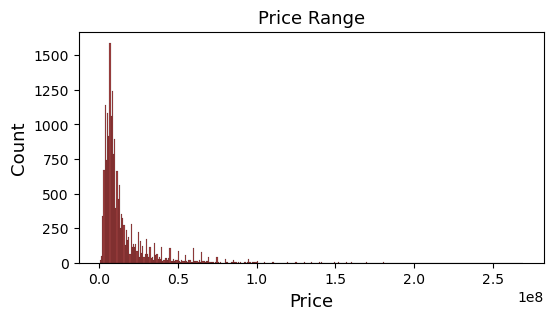

In [66]:
import seaborn as sns
plt.figure(figsize=(6,3))
sns.histplot(df8["price"],color="Maroon")
plt.title("Price Range",size=13)
plt.xlabel("Price",size=13)
plt.ylabel("Count",size=13)
plt.show()

Text(0.5, 0, 'Columns')

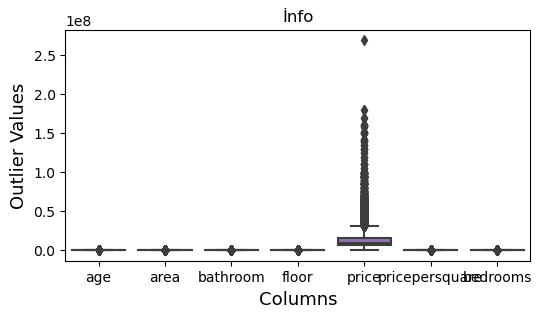

In [67]:
plt.figure(figsize=(6,3))
sns.boxplot(data=df8);
plt.title("İnfo")
plt.ylabel("Outlier Values",size=13)
plt.xlabel("Columns",size=13)

In [68]:
Q1, Q3 = df8.price.quantile([0.25, 0.75])
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print("Q1=", Q1,"Q3=", Q3,"IQR=", IQR,"lower_limit=",lower_limit,"upper_limit=",upper_limit )

Q1= 6100000.0 Q3= 16000000.0 IQR= 9900000.0 lower_limit= -8750000.0 upper_limit= 30850000.0


In [69]:
df9 = df8[(df8.price>lower_limit) & (df8.price<upper_limit)]
df9.describe()

,age,area,bathroom,floor,price,pricepersquare,bedrooms
count,16368.000000,16368.000000,16368.000000,16368.000000,1.636800e+04,16368.000000,16368.000000
mean,6.342314,1346.843414,2.271566,4.756109,1.016755e+07,7344.469697,2.320259
std,4.454913,649.049921,0.874193,2.989323,6.368242e+06,2548.848897,0.809201
min,0.500000,220.000000,1.000000,1.000000,4.700000e+05,705.000000,1.000000
25%,2.500000,950.000000,2.000000,2.000000,5.800000e+06,5666.000000,2.000000
50%,5.500000,1201.000000,2.000000,4.000000,8.200000e+06,6793.500000,2.000000
75%,10.500000,1610.000000,3.000000,7.000000,1.250000e+07,8375.000000,3.000000
max,42.000000,8500.000000,6.000000,26.000000,3.080000e+07,43200.000000,6.000000


Text(0.5, 1.0, 'price vs area * pricepersquare')

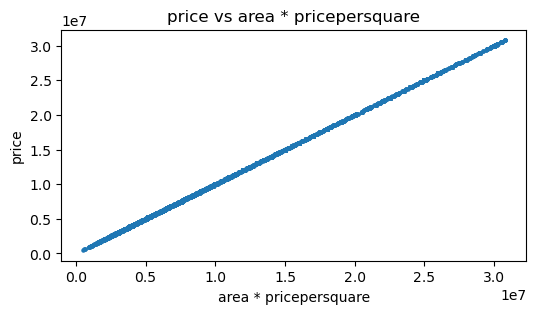

In [70]:
plt.figure(figsize=(6,3))
plt.scatter(df9.area*df9.pricepersquare, df9.price, s=5)
plt.xlabel("area * pricepersquare")
plt.ylabel("price")
plt.title("price vs area * pricepersquare")

In [71]:
df9.drop('pricepersquare', axis = 1, inplace = True)

C:\Users\Anuj Verma\AppData\Local\Temp\ipykernel_1260\1552915749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9.drop('pricepersquare', axis = 1, inplace = True)


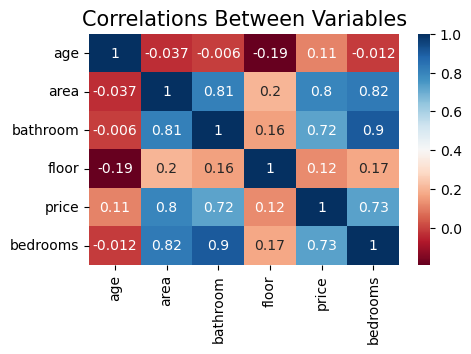

In [72]:
plt.figure(figsize=(5,3))
sns.heatmap(df9.corr(), annot = True, cmap= "RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [73]:
corr_cols = list(df9.corr()['price'][(df9.corr()['price']>0.50) | (df9.corr()['price']<-0.50)].index)
corr_cols

['area', 'bathroom', 'price', 'bedrooms']

In [74]:
cat_cols = ['locality', 'ownership']
imp_cols = corr_cols + cat_cols
imp_cols

['area', 'bathroom', 'price', 'bedrooms', 'locality', 'ownership']

In [75]:
df10 = df9[imp_cols]
df10.head()

,area,bathroom,price,bedrooms,locality,ownership
0,1611,3,27000000,3,Deccan Gymkhana,Co-Operative Society
1,1279,2,7610050,2,Kharadi,Freehold
2,670,1,4100000,1,Sus,Freehold
3,956,2,5736000,2,Bavdhan,Freehold
4,1706,3,29002000,3,Deccan Gymkhana,Freehold


Text(0.5, 0, 'Columns')

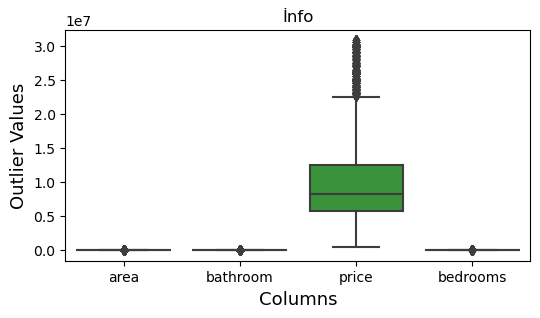

In [76]:
plt.figure(figsize=(6,3))
sns.boxplot(data=df10);
plt.title("İnfo")
plt.ylabel("Outlier Values",size=13)
plt.xlabel("Columns",size=13)

In [77]:
df10.describe()

,area,bathroom,price,bedrooms
count,16368.000000,16368.000000,1.636800e+04,16368.000000
mean,1346.843414,2.271566,1.016755e+07,2.320259
std,649.049921,0.874193,6.368242e+06,0.809201
min,220.000000,1.000000,4.700000e+05,1.000000
25%,950.000000,2.000000,5.800000e+06,2.000000
50%,1201.000000,2.000000,8.200000e+06,2.000000
75%,1610.000000,3.000000,1.250000e+07,3.000000
max,8500.000000,6.000000,3.080000e+07,6.000000


In [78]:
df10.shape

(16368, 6)

In [79]:
df10.head()

,area,bathroom,price,bedrooms,locality,ownership
0,1611,3,27000000,3,Deccan Gymkhana,Co-Operative Society
1,1279,2,7610050,2,Kharadi,Freehold
2,670,1,4100000,1,Sus,Freehold
3,956,2,5736000,2,Bavdhan,Freehold
4,1706,3,29002000,3,Deccan Gymkhana,Freehold


In [80]:
dummies1 = pd.get_dummies(df10.locality)
dummies2 = pd.get_dummies(df10.ownership)
dummies1.head()

,Ambegaon Budruk,Ashok Nagar,Aundh,Balewadi,Baner,Baner Pashan Link Road,Baner Road,Bavdhan,Bibwewadi,Boat Club Road,...,Viman Nagar,Vishrantwadi,Wadgaon Sheri,Wagholi,Wakad,Wanowrie,Wanwadi,Warje,Yerawada,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
dummies2.head()

,Co-Operative Society,Freehold,Leasehol,Power of Attorney
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [82]:
df11 = pd.concat([df10, dummies1.drop('other', axis=1), dummies2.drop('Freehold', axis=1)], axis=1).drop(['locality', 'ownership'], axis=1)
df11.head()

,area,bathroom,price,bedrooms,Ambegaon Budruk,Ashok Nagar,Aundh,Balewadi,Baner,Baner Pashan Link Road,...,Wadgaon Sheri,Wagholi,Wakad,Wanowrie,Wanwadi,Warje,Yerawada,Co-Operative Society,Leasehol,Power of Attorney
0,1611,3,27000000,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1279,2,7610050,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,670,1,4100000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,956,2,5736000,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1706,3,29002000,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
df11.describe()

,area,bathroom,price,bedrooms,Ambegaon Budruk,Ashok Nagar,Aundh,Balewadi,Baner,Baner Pashan Link Road,...,Wadgaon Sheri,Wagholi,Wakad,Wanowrie,Wanwadi,Warje,Yerawada,Co-Operative Society,Leasehol,Power of Attorney
count,16368.000000,16368.000000,1.636800e+04,16368.000000,16368.000000,16368.000000,16368.000000,16368.000000,16368.000000,16368.000000,...,16368.000000,16368.000000,16368.000000,16368.000000,16368.000000,16368.000000,16368.000000,16368.000000,16368.000000,16368.000000
mean,1346.843414,2.271566,1.016755e+07,2.320259,0.001527,0.000916,0.009836,0.018512,0.039406,0.002199,...,0.023827,0.067143,0.018817,0.006048,0.000855,0.001222,0.012952,0.104961,0.003605,0.001588
std,649.049921,0.874193,6.368242e+06,0.809201,0.039053,0.030260,0.098692,0.134797,0.194565,0.046848,...,0.152515,0.250277,0.135883,0.077538,0.029234,0.034935,0.113071,0.306512,0.059932,0.039825
min,220.000000,1.000000,4.700000e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,950.000000,2.000000,5.800000e+06,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1201.000000,2.000000,8.200000e+06,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1610.000000,3.000000,1.250000e+07,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8500.000000,6.000000,3.080000e+07,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
df11.shape

(16368, 91)

In [85]:
X = df11.drop(['price'], axis=1)
y = df11.price
X.head()

,area,bathroom,bedrooms,Ambegaon Budruk,Ashok Nagar,Aundh,Balewadi,Baner,Baner Pashan Link Road,Baner Road,...,Wadgaon Sheri,Wagholi,Wakad,Wanowrie,Wanwadi,Warje,Yerawada,Co-Operative Society,Leasehol,Power of Attorney
0,1611,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1279,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,670,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,956,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1706,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
y.head()

0    27000000
1     7610050
2     4100000
3     5736000
4    29002000
Name: price, dtype: int32

In [87]:
import warnings
warnings.filterwarnings('ignore')

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=10)

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def model_error(y_test,y_predictions):
    rmse=np.sqrt(mean_squared_error(y_test, y_predictions))
    r2=r2_score(y_test,y_predictions)
    return rmse,r2
def model_error_cv(model):
    rmse_cv=np.sqrt(-1*cross_val_score(model,X_train,y_train,cv=10,scoring="neg_mean_squared_error")).mean()
    return rmse_cv

In [91]:
model_compare = pd.DataFrame(columns=["Model","RMSE","R2","RMSE_CV"])

In [92]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_predictions = model.predict(X_test)
rmse, r2 = model_error(y_test, y_predictions)
rmse_cv = model_error_cv(model)
new_compare_row = {"Model": str(model) ,"RMSE": rmse,"R2": r2, "RMSE_CV": rmse_cv}
model_compare = model_compare.append(new_compare_row, ignore_index = True)
model_compare

,Model,RMSE,R2,RMSE_CV
0,LinearRegression(),2.936539e+06,0.784692,2.731659e+06


In [93]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
y_predictions = model.predict(X_test)
rmse, r2 = model_error(y_test, y_predictions)
rmse_cv = model_error_cv(model)
new_compare_row = {"Model": str(model) ,"RMSE": rmse,"R2": r2, "RMSE_CV": rmse_cv}
model_compare = model_compare.append(new_compare_row, ignore_index = True)
model_compare

,Model,RMSE,R2,RMSE_CV
0,LinearRegression(),2.936539e+06,0.784692,2.731659e+06
1,Ridge(),2.938075e+06,0.784467,2.731821e+06


In [94]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train, y_train)
y_predictions = model.predict(X_test)
rmse, r2 = model_error(y_test, y_predictions)
rmse_cv = model_error_cv(model)
new_compare_row = {"Model": str(model) ,"RMSE": rmse,"R2": r2, "RMSE_CV": rmse_cv}
model_compare = model_compare.append(new_compare_row, ignore_index = True)
model_compare

,Model,RMSE,R2,RMSE_CV
0,LinearRegression(),2.936539e+06,0.784692,2.731659e+06
1,Ridge(),2.938075e+06,0.784467,2.731821e+06
2,Lasso(),2.936538e+06,0.784692,2.731657e+06


In [95]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train, y_train)
y_predictions = model.predict(X_test)
rmse, r2 = model_error(y_test, y_predictions)
rmse_cv = model_error_cv(model)
new_compare_row = {"Model": str(model) ,"RMSE": rmse,"R2": r2, "RMSE_CV": rmse_cv}
model_compare = model_compare.append(new_compare_row, ignore_index = True)
model_compare

,Model,RMSE,R2,RMSE_CV
0,LinearRegression(),2.936539e+06,0.784692,2.731659e+06
1,Ridge(),2.938075e+06,0.784467,2.731821e+06
2,Lasso(),2.936538e+06,0.784692,2.731657e+06
3,KNeighborsRegressor(),2.753516e+06,0.810694,2.837654e+06


In [96]:
from sklearn.svm import SVR
model = SVR(C = 10000)
model.fit(X_train, y_train)
y_predictions = model.predict(X_test)
rmse, r2 = model_error(y_test, y_predictions)
rmse_cv = model_error_cv(model)
new_compare_row = {"Model": str(model) ,"RMSE": rmse,"R2": r2, "RMSE_CV": rmse_cv}
model_compare = model_compare.append(new_compare_row, ignore_index = True)
model_compare

,Model,RMSE,R2,RMSE_CV
0,LinearRegression(),2.936539e+06,0.784692,2.731659e+06
1,Ridge(),2.938075e+06,0.784467,2.731821e+06
2,Lasso(),2.936538e+06,0.784692,2.731657e+06
3,KNeighborsRegressor(),2.753516e+06,0.810694,2.837654e+06
4,SVR(C=10000),3.951385e+06,0.610160,4.089596e+06


In [97]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
y_predictions = model.predict(X_test)
rmse, r2 = model_error(y_test, y_predictions)
rmse_cv = model_error_cv(model)
new_compare_row = {"Model": str(model) ,"RMSE": rmse,"R2": r2, "RMSE_CV": rmse_cv}
model_compare = model_compare.append(new_compare_row, ignore_index = True)
model_compare

,Model,RMSE,R2,RMSE_CV
0,LinearRegression(),2.936539e+06,0.784692,2.731659e+06
1,Ridge(),2.938075e+06,0.784467,2.731821e+06
2,Lasso(),2.936538e+06,0.784692,2.731657e+06
3,KNeighborsRegressor(),2.753516e+06,0.810694,2.837654e+06
4,SVR(C=10000),3.951385e+06,0.610160,4.089596e+06
5,RandomForestRegressor(),2.043367e+06,0.895749,2.107283e+06


In [98]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor()
model.fit(X_train, y_train)
y_predictions = model.predict(X_test)
rmse, r2 = model_error(y_test, y_predictions)
rmse_cv = model_error_cv(model)
new_compare_row = {"Model": str(model) ,"RMSE": rmse,"R2": r2, "RMSE_CV": rmse_cv}
model_compare = model_compare.append(new_compare_row, ignore_index = True)
model_compare

,Model,RMSE,R2,RMSE_CV
0,LinearRegression(),2.936539e+06,0.784692,2.731659e+06
1,Ridge(),2.938075e+06,0.784467,2.731821e+06
2,Lasso(),2.936538e+06,0.784692,2.731657e+06
3,KNeighborsRegressor(),2.753516e+06,0.810694,2.837654e+06
4,SVR(C=10000),3.951385e+06,0.610160,4.089596e+06
5,RandomForestRegressor(),2.043367e+06,0.895749,2.107283e+06
6,BaggingRegressor(),2.087789e+06,0.891167,2.157409e+06


In [99]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
y_predictions = model.predict(X_test)
rmse, r2 = model_error(y_test, y_predictions)
rmse_cv = model_error_cv(model)
new_compare_row = {"Model": str(model) ,"RMSE": rmse,"R2": r2, "RMSE_CV": rmse_cv}
model_compare = model_compare.append(new_compare_row, ignore_index = True)
model_compare

,Model,RMSE,R2,RMSE_CV
0,LinearRegression(),2.936539e+06,0.784692,2.731659e+06
1,Ridge(),2.938075e+06,0.784467,2.731821e+06
2,Lasso(),2.936538e+06,0.784692,2.731657e+06
3,KNeighborsRegressor(),2.753516e+06,0.810694,2.837654e+06
4,SVR(C=10000),3.951385e+06,0.610160,4.089596e+06
5,RandomForestRegressor(),2.043367e+06,0.895749,2.107283e+06
6,BaggingRegressor(),2.087789e+06,0.891167,2.157409e+06
7,"XGBRegressor(base_score=0.5, booster='gbtree',...",1.987423e+06,0.901379,2.089914e+06


In [100]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_predictions = model.predict(X_test)
rmse, r2 = model_error(y_test, y_predictions)
rmse_cv = model_error_cv(model)
new_compare_row = {"Model": str(model) ,"RMSE": rmse,"R2": r2, "RMSE_CV": rmse_cv}
model_compare = model_compare.append(new_compare_row, ignore_index = True)
model_compare

,Model,RMSE,R2,RMSE_CV
0,LinearRegression(),2.936539e+06,0.784692,2.731659e+06
1,Ridge(),2.938075e+06,0.784467,2.731821e+06
2,Lasso(),2.936538e+06,0.784692,2.731657e+06
3,KNeighborsRegressor(),2.753516e+06,0.810694,2.837654e+06
4,SVR(C=10000),3.951385e+06,0.610160,4.089596e+06
5,RandomForestRegressor(),2.043367e+06,0.895749,2.107283e+06
6,BaggingRegressor(),2.087789e+06,0.891167,2.157409e+06
7,"XGBRegressor(base_score=0.5, booster='gbtree',...",1.987423e+06,0.901379,2.089914e+06
8,GradientBoostingRegressor(),2.401667e+06,0.855983,2.466772e+06


In [101]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_predictions = model.predict(X_test)
rmse, r2 = model_error(y_test, y_predictions)
rmse_cv = model_error_cv(model)
new_compare_row = {"Model": str(model) ,"RMSE": rmse,"R2": r2, "RMSE_CV": rmse_cv}
model_compare = model_compare.append(new_compare_row, ignore_index = True)
model_compare

,Model,RMSE,R2,RMSE_CV
0,LinearRegression(),2.936539e+06,0.784692,2.731659e+06
1,Ridge(),2.938075e+06,0.784467,2.731821e+06
2,Lasso(),2.936538e+06,0.784692,2.731657e+06
3,KNeighborsRegressor(),2.753516e+06,0.810694,2.837654e+06
4,SVR(C=10000),3.951385e+06,0.610160,4.089596e+06
5,RandomForestRegressor(),2.043367e+06,0.895749,2.107283e+06
6,BaggingRegressor(),2.087789e+06,0.891167,2.157409e+06
7,"XGBRegressor(base_score=0.5, booster='gbtree',...",1.987423e+06,0.901379,2.089914e+06
8,GradientBoostingRegressor(),2.401667e+06,0.855983,2.466772e+06
9,DecisionTreeRegressor(),2.282410e+06,0.869931,2.319531e+06


In [102]:
from sklearn.preprocessing import PolynomialFeatures      # The code is different
model = PolynomialFeatures()
X_train_2d = model.fit_transform(X_train)
X_test_2d = model.transform(X_test)
model2 = LinearRegression()
model2.fit(X_train_2d, y_train)
y_predictions = model2.predict(X_test_2d)
rmse, r2 = model_error(y_test, y_predictions)
rmse_cv = model_error_cv(model2)
new_compare_row = {"Model": str(model) ,"RMSE": rmse,"R2": r2, "RMSE_CV": rmse_cv}
model_compare = model_compare.append(new_compare_row, ignore_index = True)
model_compare

,Model,RMSE,R2,RMSE_CV
0,LinearRegression(),2.936539e+06,0.784692,2.731659e+06
1,Ridge(),2.938075e+06,0.784467,2.731821e+06
2,Lasso(),2.936538e+06,0.784692,2.731657e+06
3,KNeighborsRegressor(),2.753516e+06,0.810694,2.837654e+06
4,SVR(C=10000),3.951385e+06,0.610160,4.089596e+06
5,RandomForestRegressor(),2.043367e+06,0.895749,2.107283e+06
6,BaggingRegressor(),2.087789e+06,0.891167,2.157409e+06
7,"XGBRegressor(base_score=0.5, booster='gbtree',...",1.987423e+06,0.901379,2.089914e+06
8,GradientBoostingRegressor(),2.401667e+06,0.855983,2.466772e+06
9,DecisionTreeRegressor(),2.282410e+06,0.869931,2.319531e+06


In [103]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(X_train, y_train)
y_predictions = model.predict(X_test)
rmse, r2 = model_error(y_test, y_predictions)
rmse_cv = model_error_cv(model)
new_compare_row = {"Model": str(model) ,"RMSE": rmse,"R2": r2, "RMSE_CV": rmse_cv}
model_compare = model_compare.append(new_compare_row, ignore_index = True)
model_compare

,Model,RMSE,R2,RMSE_CV
0,LinearRegression(),2.936539e+06,0.784692,2.731659e+06
1,Ridge(),2.938075e+06,0.784467,2.731821e+06
2,Lasso(),2.936538e+06,0.784692,2.731657e+06
3,KNeighborsRegressor(),2.753516e+06,0.810694,2.837654e+06
4,SVR(C=10000),3.951385e+06,0.610160,4.089596e+06
5,RandomForestRegressor(),2.043367e+06,0.895749,2.107283e+06
6,BaggingRegressor(),2.087789e+06,0.891167,2.157409e+06
7,"XGBRegressor(base_score=0.5, booster='gbtree',...",1.987423e+06,0.901379,2.089914e+06
8,GradientBoostingRegressor(),2.401667e+06,0.855983,2.466772e+06
9,DecisionTreeRegressor(),2.282410e+06,0.869931,2.319531e+06


In [104]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor()
model.fit(X_train, y_train)
y_predictions = model.predict(X_test)
rmse, r2 = model_error(y_test, y_predictions)
rmse_cv = model_error_cv(model)
new_compare_row = {"Model": str(model) ,"RMSE": rmse,"R2": r2, "RMSE_CV": rmse_cv}
model_compare = model_compare.append(new_compare_row, ignore_index = True)
model_compare

,Model,RMSE,R2,RMSE_CV
0,LinearRegression(),2.936539e+06,0.784692,2.731659e+06
1,Ridge(),2.938075e+06,0.784467,2.731821e+06
2,Lasso(),2.936538e+06,0.784692,2.731657e+06
3,KNeighborsRegressor(),2.753516e+06,0.810694,2.837654e+06
4,SVR(C=10000),3.951385e+06,0.610160,4.089596e+06
5,RandomForestRegressor(),2.043367e+06,0.895749,2.107283e+06
6,BaggingRegressor(),2.087789e+06,0.891167,2.157409e+06
7,"XGBRegressor(base_score=0.5, booster='gbtree',...",1.987423e+06,0.901379,2.089914e+06
8,GradientBoostingRegressor(),2.401667e+06,0.855983,2.466772e+06
9,DecisionTreeRegressor(),2.282410e+06,0.869931,2.319531e+06


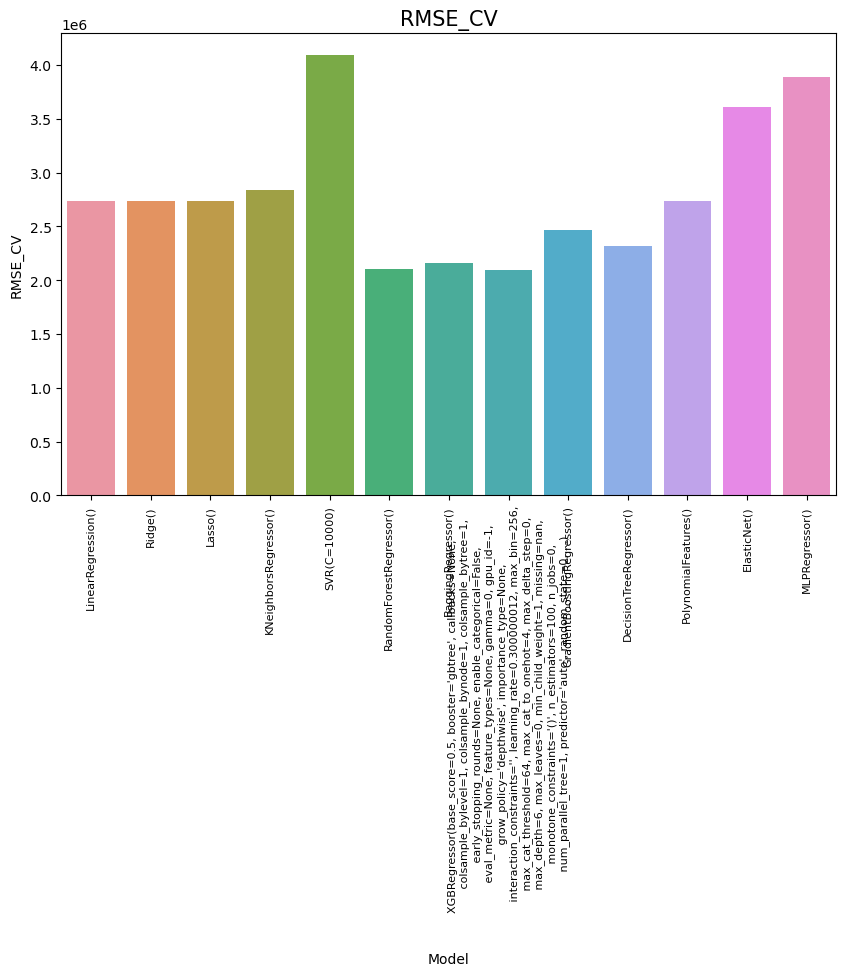

In [172]:
plt.figure(figsize=(10,6))
sns.barplot(model_compare["Model"],model_compare["RMSE_CV"])
plt.title("RMSE_CV", size=15)
plt.xticks(rotation=90, size=8)
plt.show()

In [171]:
model_compare[model_compare.RMSE_CV == model_compare.RMSE_CV.min()]

,Model,RMSE,R2,RMSE_CV
7,"XGBRegressor(base_score=0.5, booster='gbtree',...",1.987423e+06,0.901379,2.089914e+06


In [128]:
np.where(X.columns == 'Deccan Gymkhana')[0][0]

16

In [198]:
X_train.shape, y_train.shape

((13094, 90), (13094,))

In [199]:
model = XGBRegressor()
model.fit(X_train.values,y_train.values)

def predict_price(locality, ownership, area, bedrooms, bathroom):
    x = np.zeros(len(X.columns))
    x[0] = area
    x[1] = bathroom
    x[2] = bedrooms   
    if (locality in dummies1.columns.drop('other')):
        if (np.where(X.columns == locality)[0][0] >= 0):
            x[np.where(X.columns == locality)[0][0]] = 1
    if (ownership in dummies2.columns.drop('Freehold')):
        if (np.where(X.columns == ownership)[0][0] >= 0):
            x[np.where(X.columns == ownership)[0][0]] = 1
    return model.predict([x])

In [187]:
# df10.locality.unique()

In [188]:
# df10.ownership.unique() 

In [189]:
df11.describe()

,area,bathroom,price,bedrooms,Ambegaon Budruk,Ashok Nagar,Aundh,Balewadi,Baner,Baner Pashan Link Road,...,Wadgaon Sheri,Wagholi,Wakad,Wanowrie,Wanwadi,Warje,Yerawada,Co-Operative Society,Leasehol,Power of Attorney
count,16368.000000,16368.000000,1.636800e+04,16368.000000,16368.000000,16368.000000,16368.000000,16368.000000,16368.000000,16368.000000,...,16368.000000,16368.000000,16368.000000,16368.000000,16368.000000,16368.000000,16368.000000,16368.000000,16368.000000,16368.000000
mean,1346.843414,2.271566,1.016755e+07,2.320259,0.001527,0.000916,0.009836,0.018512,0.039406,0.002199,...,0.023827,0.067143,0.018817,0.006048,0.000855,0.001222,0.012952,0.104961,0.003605,0.001588
std,649.049921,0.874193,6.368242e+06,0.809201,0.039053,0.030260,0.098692,0.134797,0.194565,0.046848,...,0.152515,0.250277,0.135883,0.077538,0.029234,0.034935,0.113071,0.306512,0.059932,0.039825
min,220.000000,1.000000,4.700000e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,950.000000,2.000000,5.800000e+06,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1201.000000,2.000000,8.200000e+06,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1610.000000,3.000000,1.250000e+07,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8500.000000,6.000000,3.080000e+07,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [202]:
print( predict_price('Aundh' , 'Freehold', 1000 , 2, 3) )  # Enter Locality, Ownership, Area, Bedrooms, Bathroom

[8778328.]
